<a href="https://colab.research.google.com/github/hhchin1995/plastic-quality-clustering/blob/main/Classification_plastic_PET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

# dataset = pd.read_csv('PRES_plastic4-1.csv')
dataset = pd.read_csv('Plastic_PET_All_2.csv')
# PET
# X = dataset.iloc[:-54, 2:4].values
# y = dataset.iloc[:-54, 5].values

# PE
# X = dataset.iloc[15:-20, 2:5].values
# X[:,1]=X[:,2]
# X=X[:,:-1]
# y = dataset.iloc[15:-20, 5].values

# Two properties
# X_d = dataset.iloc[:, 2:].values
# X=np.zeros((X_d.shape[0],2))
# X[:,0]=X_d[:,14]
# X[:,1]=X_d[:,15]

# y = dataset.iloc[:, 0].values

# All properties
X = dataset.iloc[:, 2:23].values

y = dataset.iloc[:, 0].values

# X=X[0:14]
# y=y[0:14]

print(X[26,:].shape)

# PP
# X = dataset.iloc[50:, 2:5].values
# X[:,1]=X[:,2]
# X=np.delete(X,8,0)
# X=X[:,:-1]
# y = dataset.iloc[50:, 5].values
# y=np.delete(y,8,0)




Saving Plastic_PET_All_2.csv to Plastic_PET_All_2 (2).csv
(21,)


Visualising training plot

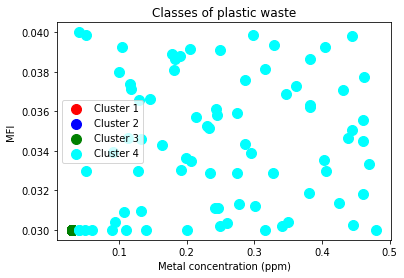

In [ ]:
# Visualising the clusters 
plt.scatter(X[y== 1, 0], X[y == 1, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Classes of plastic waste')
plt.xlabel('Metal concentration (ppm)')
plt.ylabel('MFI ')
plt.legend()
plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:

# features=['Metals','MFI']
features=['As','Cd','Co','Cr','Cu','Fe','Hg','Li','Mn','Ni','Pb','Sb','Ti','Zn','Al','IV','Tensile','Paper','Cardboards','Food residues','Others']
classes=['Virgin','Industrial','Household','Waste']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 10) # PE: Use 0.2 test size, random_state=10 (After SMOTE: 0.45,10)
                                                                                              # PP: Use 0.4 and 0.5, random state=10
                                                                                              # PET: Use  0.5, random state=10

print(X_train)
print(y_train)

[[0.03       0.03       0.34168319 ... 2.88154847 1.2670149  2.        ]
 [0.03       0.03       0.27804569 ... 2.70735893 1.27146183 2.        ]
 [0.4624356  0.03772798 2.96232183 ... 6.10887013 1.08394727 2.06896816]
 ...
 [0.03       0.03       0.21       ... 4.49722704 1.         2.        ]
 [0.03       0.03       0.32211003 ... 2.50096572 1.22928939 2.        ]
 [0.03       0.03       0.36199419 ... 2.91064117 1.22305131 2.        ]]
[2 2 4 2 3 1 1 3 4 2 4 3 3 3 4 1 4 1 4 3 4 1 1 2 4 4 2 4 2 4 1 3 1 3 4 2 2
 2 2 3 1 4 4 3 1 4 4 1 2 1 2 4 3 2 2 3 1 3 3 3 4 4 1 2 3 1 1 2 3 4 4 1 2 1
 4 1 3 4 2 1 3 2 3 2 4 1 2 4 3 1 3 3 3 2 2 1 2 4 3 4 2 2 2 3 1 1 3 1 1 4 4
 1 4 3 4 3 2 4 2 2 2 1 2 1 4 3 4 3 1 3 4 1 1 3 3 4 4 4 4 3 2 3 3 4 3 4 4 3
 2 3 3 3 1 2 3 1 2 2 1 1 4 1 3 2 4 2 2 2 4 4 1 1 4 2 2 3 4 2 2 4 4 2 1 2 4
 4 2 1 3 4 1 4 3 2 3 1 2 2]


**Oversampling (Create additional datapoints) OR Undersampling (clean data)**

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
sm = SMOTE(k_neighbors=3,random_state=42)
#X_train, y_train = sm.fit_resample(X_train, y_train)

from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
# X_train, y_train = smoteenn.fit_resample(X_train, y_train)

print(y_train)


[1 1 4 3 2 2 2 3 1 1 2 2 2 3 4 4 2 3 1 1 1 2 4 3 2 3 1 3 2 1 4 2 4 2 2 2 4
 4 4 4 4 4 1 4 2 2 4 1 1 2 3 2 3 3 1 2 1 4 4 3 4 1 2 4 4 2 3 1 4 2 4 3 1 1
 3 2 4 4 4 1 2 2 3 4 3 2 4 2 3 1 1 2 1 2 4 3 4 1 4 2 2 2 4 3 4 2 4 2 4 2 4
 4 2 2 1 2 2 4 1 1 3 2 1 2 2 2 3 3 4 2 3 3 4 1 3 2 4 4 3 2 2 1 4 2 2 4 4 1
 4 1 1 2 2 2 2 4 4 2 3 4 4 3 2 3 4 3 1]


**Custom Sampling + Oversampling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Scale Features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)

# Fit KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_scaled, y_train)
preds = pd.DataFrame(knn.predict_proba(x_train_scaled))

preds.columns = ['label_0', 'label_1','label_2','label_3']

# Bind defaulted label proba to train dataset
# print(preds.iloc[1,2])

y_prob=np.zeros((len(y_train),1))
for i in range(0,len(y_train)):
  y_prob[i]=preds.iloc[i,int(y_train[i])-1]

#print(y_prob)
# X_train['knn_minority_class_proba'] = preds['label_1']

x_train_filtered=np.zeros(X_train.shape)
y_train_filtered=np.zeros(X_train.shape[0])

for ii in range(0,len(y_train_filtered)):
  if y_prob[ii]>=0.5:
    x_train_filtered[ii,:] = X_train[ii,:]
    y_train_filtered[ii] = y_train[ii]

x_train_filtered=x_train_filtered[np.all(x_train_filtered >0, axis=1), :]
y_train_filtered=y_train_filtered[y_train_filtered >0]


# Oversample using SMOTE
sm = SMOTE(k_neighbors=1,random_state=40)
X_train, y_train = sm.fit_resample(x_train_filtered, y_train_filtered)

print(y_train)

[2. 2. 4. 2. 3. 1. 3. 4. 2. 4. 3. 3. 3. 4. 1. 4. 1. 4. 3. 4. 1. 1. 2. 4.
 4. 2. 4. 2. 4. 1. 3. 1. 3. 4. 2. 2. 2. 2. 3. 1. 4. 4. 3. 1. 4. 4. 1. 2.
 1. 2. 4. 3. 2. 2. 3. 1. 3. 3. 3. 4. 4. 1. 2. 3. 1. 1. 2. 3. 4. 4. 1. 2.
 1. 4. 1. 3. 4. 2. 1. 3. 2. 3. 2. 4. 1. 2. 4. 3. 1. 3. 3. 3. 2. 2. 1. 2.
 4. 3. 4. 2. 2. 2. 3. 1. 1. 3. 1. 1. 4. 4. 1. 4. 3. 4. 3. 2. 4. 2. 2. 2.
 1. 2. 1. 4. 3. 4. 3. 1. 3. 4. 1. 1. 3. 3. 4. 4. 4. 4. 3. 2. 3. 3. 4. 3.
 4. 4. 3. 2. 3. 3. 3. 1. 2. 3. 1. 2. 2. 1. 1. 4. 1. 3. 2. 4. 2. 2. 2. 4.
 4. 1. 1. 4. 2. 2. 3. 4. 2. 2. 4. 4. 2. 1. 2. 4. 4. 2. 1. 3. 4. 1. 4. 3.
 2. 3. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 3. 3. 3. 3. 3. 3.]


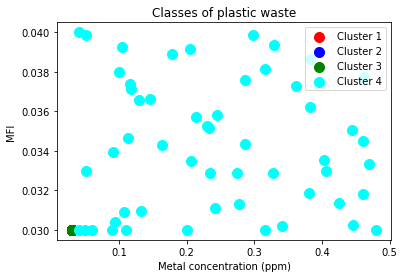

In [ ]:
# Visualising the clusters 
plt.scatter(X_train[y_train== 1, 0], X_train[y_train == 1, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_train == 3, 0], X_train[y_train == 3, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train[y_train == 4, 0], X_train[y_train == 4, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Classes of plastic waste')
plt.xlabel('Metal concentration (ppm)')
plt.ylabel('MFI ')
plt.legend()
plt.show()

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_test)

print(y_test)


[[-0.46398744 -0.43333505 -0.80457556 ... -1.2488604   1.12751657
  -0.51518032]
 [-0.46398744 -0.43333505 -0.84957711 ... -0.04245233 -1.19877561
  -0.51518032]
 [ 2.6073114   2.12366791 -0.67022906 ...  1.27807509 -0.93889586
   2.69969079]
 ...
 [ 1.42049447  0.00826841  0.09346996 ...  1.55932455 -0.8785761
   1.47137386]
 [-0.46398744 -0.43333505  1.52887116 ... -0.04017446  0.48101805
  -0.51518032]
 [-0.46398744 -0.43333505  0.9491963  ...  0.09524853  0.73308005
  -0.51518032]]
[2 1 4 3 4 2 2 2 3 3 4 3 1 1 3 3 3 2 3 1 3 1 1 3 4 4 2 1 4 3 4 3 2 4 4 1 2
 1 1 4 3 3 2 1 4 3 1 2 3 4 4 1 3 3 4 4 2 3 4 3 2 4 1 2 1 3 1 4 1 2 3 1 4 1
 2 1 3 4 2 1 1 2 3 2 2 1 1 2 4 1 3 4 1 3 1 2 2 2 4 3 2 4 3 2 4 3 3]


## Training the Decision Tree Classification model on the Training set

|--- IV <= 0.60
|   |--- class: 4.0
|--- IV >  0.60
|   |--- Sb <= 186.50
|   |   |--- class: 2.0
|   |--- Sb >  186.50
|   |   |--- Co <= 1.67
|   |   |   |--- class: 1.0
|   |   |--- Co >  1.67
|   |   |   |--- class: 3.0



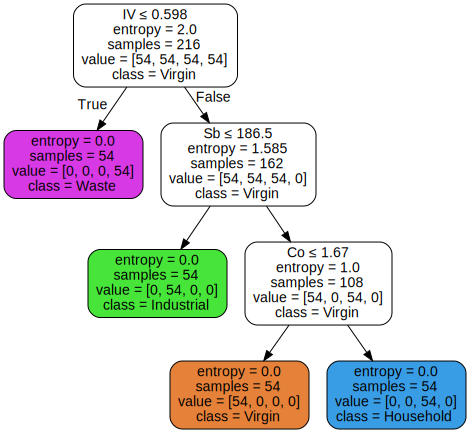

In [ ]:
features=['As','Cd','Co','Cr','Cu','Fe','Hg','Li','Mn','Ni','Pb','Sb','Ti','Zn','Al','IV','Tensile','Paper','Cardboards','Food residues','Others']
#graph.render("iris") 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 25,max_features=2,max_depth=3) #PE Random_state = 25,  #PP Random_state = 0. #PET Random_state=25
classifier.fit(X_train, y_train)
#tree.plot_tree(classifier)

r=export_text(classifier,feature_names=features)
print(r)




import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph



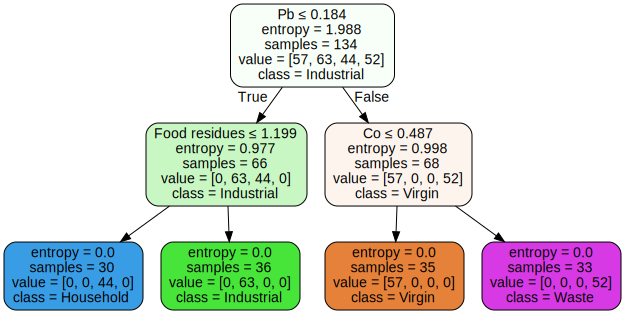

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 25,max_features=2,max_depth=2) #PE Random_state = 50, trees=100
                                                                                                  # PP Random_state=0, trees=100
                                                                                                  # PET Random_state=25, trees=100
                                                                                         
classifier2.fit(X_train, y_train)
estimator=classifier2.estimators_[5]

dot_data2 = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph2 = graphviz.Source(dot_data2) 
graph2

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print(accuracy_score(y_test, y_pred2))

target_names = ['Virgin','Industrial','Household','Waste']
print(classification_report(y_test, y_pred, target_names=target_names))
print(classification_report(y_test, y_pred2, target_names=target_names))




[[27  0  0  0]
 [ 0 25  0  0]
 [ 0  0 30  0]
 [ 0  0  0 25]]
1.0
[[27  0  0  0]
 [ 0 25  0  0]
 [ 0  0 30  0]
 [ 0  0  0 25]]
1.0
              precision    recall  f1-score   support

      Virgin       1.00      1.00      1.00        27
  Industrial       1.00      1.00      1.00        25
   Household       1.00      1.00      1.00        30
       Waste       1.00      1.00      1.00        25

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

              precision    recall  f1-score   support

      Virgin       1.00      1.00      1.00        27
  Industrial       1.00      1.00      1.00        25
   Household       1.00      1.00      1.00        30
       Waste       1.00      1.00      1.00        25

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



In [ ]:
# Training the SVM model on the Training set
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print(accuracy_score(y_test, y_pred3))


[[27  0  0  0]
 [ 2 23  0  0]
 [ 0  0 30  0]
 [ 0  1  0 24]]
0.9719626168224299


Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 20, 50, 30,40,60,70,80,90,100],'random_state':[0,1,10,20,30]}]
grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 100.00 %
Best Parameters: {'n_estimators': 10, 'random_state': 0}


In [ ]:
# # Visualising the Test set results
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Decision Tree Classification (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

Source = np.array([[100,0.5],[50, 1.5], [500, 0.1],[32,9.5]])
print(Source)
y_source = classifier2.predict(Source)
print(y_source)
Sink = np.array([[100,7.7],[37, 5.6], [200, 7.1],[20,8.5]])
print(Sink)
y_sink = classifier2.predict(Sink)
print(y_sink)

[[1.0e+02 5.0e-01]
 [5.0e+01 1.5e+00]
 [5.0e+02 1.0e-01]
 [3.2e+01 9.5e+00]]
[2. 2. 4. 1.]
[[100.    7.7]
 [ 37.    5.6]
 [200.    7.1]
 [ 20.    8.5]]
[1. 2. 3. 1.]


Clustering

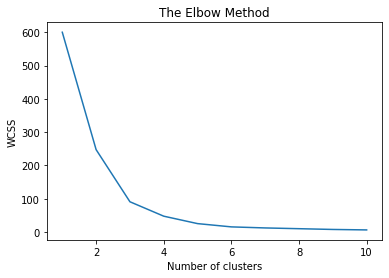

In [ ]:
# Using the elbow method to find the optimal number of clusters
X_c = X


#####X_c=X_train

sc.fit(X_c)
X_c=sc.transform(X_c)
#X_c = sc.fit_transform(X_c)




from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_c)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

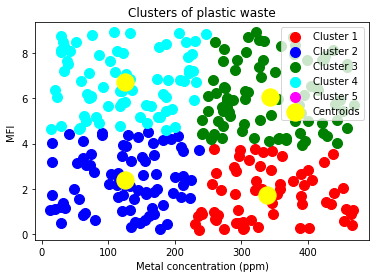

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_c)
X_c = sc.inverse_transform(X_c)
kmeans.cluster_centers_ = sc.inverse_transform(kmeans.cluster_centers_)

# Visualising the clusters
plt.scatter(X_c[y_kmeans == 0, 0], X_c[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_kmeans == 1, 0], X_c[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_kmeans == 2, 0], X_c[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_kmeans == 3, 0], X_c[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_c[y_kmeans == 4, 0], X_c[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of plastic waste')
plt.xlabel('Metal concentration (ppm)')
plt.ylabel('MFI ')
plt.legend()
plt.show()

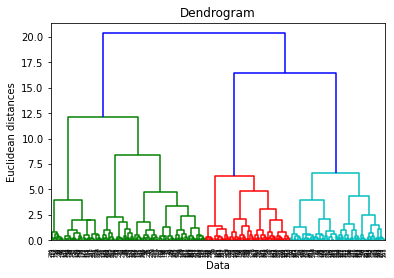

In [ ]:
import scipy.cluster.hierarchy as sch
X_c = sc.fit_transform(X_c)

dendrogram = sch.dendrogram(sch.linkage(X_c, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_c)
X_c = sc.inverse_transform(X_c)

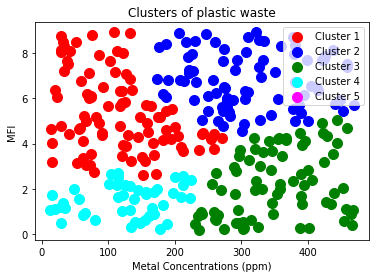

In [ ]:
# Visualising the clusters
plt.scatter(X_c[y_hc == 0, 0], X_c[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_hc == 1, 0], X_c[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_hc == 2, 0], X_c[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_hc == 3, 0], X_c[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_c[y_hc == 4, 0], X_c[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of plastic waste')
plt.xlabel('Metal Concentrations (ppm)')
plt.ylabel('MFI')
plt.legend()
plt.show()